In [1]:
#https://www.kaggle.com/datasets/jahnavipaliwal/video-game-reviews-and-ratings/data
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
)

file_path = "video_game_reviews.csv"
data = pd.read_csv(file_path)

print(data.dtypes)
print(data.shape) 
print(data.head())
print(data.isna().sum()) 

Game Title                  object
User Rating                float64
Age Group Targeted          object
Price                      float64
Platform                    object
Requires Special Device     object
Developer                   object
Publisher                   object
Release Year                 int64
Genre                       object
Multiplayer                 object
Game Length (Hours)        float64
Graphics Quality            object
Soundtrack Quality          object
Story Quality               object
User Review Text            object
Game Mode                   object
Min Number of Players        int64
dtype: object
(47774, 18)
           Game Title  User Rating Age Group Targeted  Price     Platform  \
0  Grand Theft Auto V         36.4           All Ages  41.41           PC   
1          The Sims 4         38.3             Adults  57.56           PC   
2           Minecraft         26.8              Teens  44.93           PC   
3   Bioshock Infinite         38.4  

In [2]:
# Find duplicated values:
duplicates = data[data.duplicated()]
 
# Show duplicated values:
print(f"Duplicated values: {len(duplicates)}")
print(duplicates)

Duplicated values: 0
Empty DataFrame
Columns: [Game Title, User Rating, Age Group Targeted, Price, Platform, Requires Special Device, Developer, Publisher, Release Year, Genre, Multiplayer, Game Length (Hours), Graphics Quality, Soundtrack Quality, Story Quality, User Review Text, Game Mode, Min Number of Players]
Index: []


In [3]:
print(data.describe())
print(data.describe(include=['object']))


        User Rating         Price  Release Year  Game Length (Hours)  \
count  47774.000000  47774.000000  47774.000000         47774.000000   
mean      29.719329     39.951371   2016.480952            32.481672   
std        7.550131     11.520342      4.027276            15.872508   
min       10.100000     19.990000   2010.000000             5.000000   
25%       24.300000     29.990000   2013.000000            18.800000   
50%       29.700000     39.845000   2016.000000            32.500000   
75%       35.100000     49.957500   2020.000000            46.300000   
max       49.500000     59.990000   2023.000000            60.000000   

       Min Number of Players  
count           47774.000000  
mean                5.116758  
std                 2.769521  
min                 1.000000  
25%                 3.000000  
50%                 5.000000  
75%                 7.000000  
max                10.000000  
                      Game Title Age Group Targeted     Platform  \
coun

C:\Users\admin\AppData\Local\Temp\ipykernel_23640\2330942625.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Age Group Targeted", order=data["Age Group Targeted"].value_counts().index, palette="viridis")


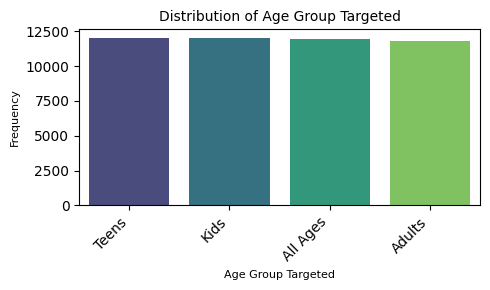

C:\Users\admin\AppData\Local\Temp\ipykernel_23640\2330942625.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Platform", order=data["Platform"].value_counts().index, palette="viridis")


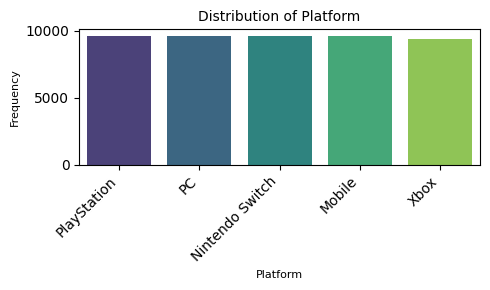

C:\Users\admin\AppData\Local\Temp\ipykernel_23640\2330942625.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Requires Special Device", order=data["Requires Special Device"].value_counts().index, palette="viridis")


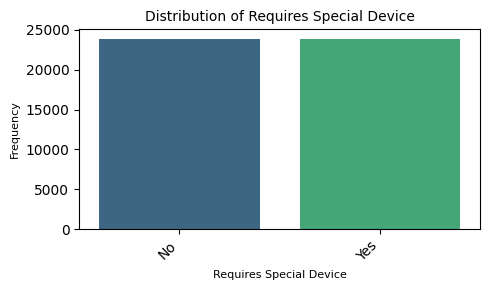

C:\Users\admin\AppData\Local\Temp\ipykernel_23640\2330942625.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Developer", order=data["Developer"].value_counts().index, palette="viridis")


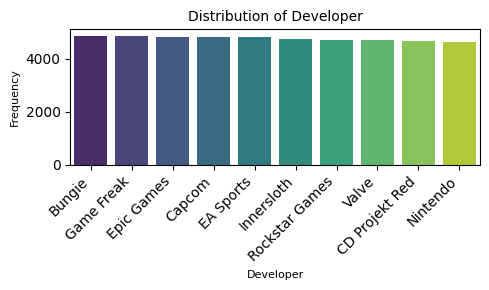

C:\Users\admin\AppData\Local\Temp\ipykernel_23640\2330942625.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Publisher", order=data["Publisher"].value_counts().index, palette="viridis")


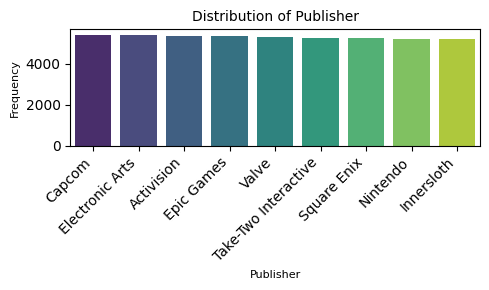

C:\Users\admin\AppData\Local\Temp\ipykernel_23640\2330942625.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Genre", order=data["Genre"].value_counts().index, palette="viridis")


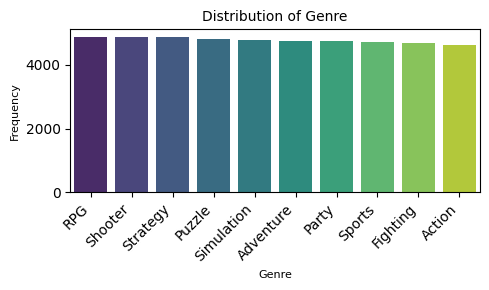

C:\Users\admin\AppData\Local\Temp\ipykernel_23640\2330942625.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Multiplayer", order=data["Multiplayer"].value_counts().index, palette="viridis")


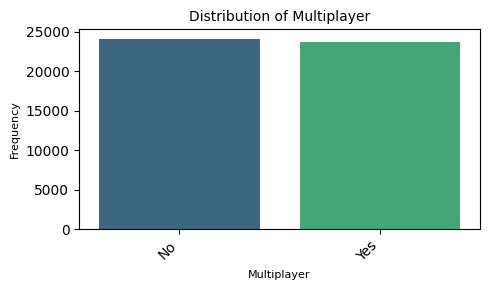

C:\Users\admin\AppData\Local\Temp\ipykernel_23640\2330942625.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Graphics Quality", order=data["Graphics Quality"].value_counts().index, palette="viridis")


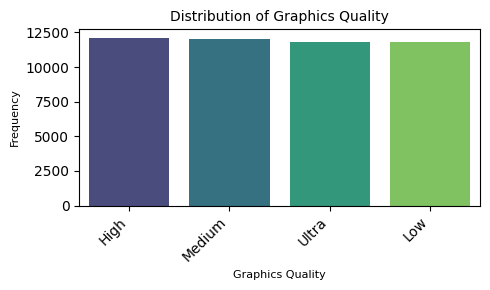

C:\Users\admin\AppData\Local\Temp\ipykernel_23640\2330942625.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Soundtrack Quality", order=data["Soundtrack Quality"].value_counts().index, palette="viridis")


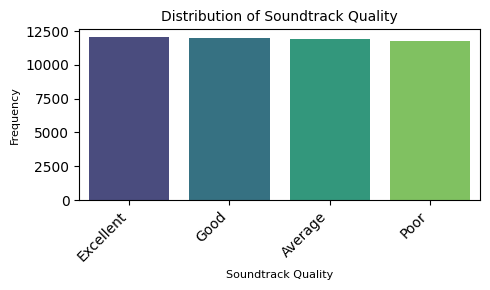

C:\Users\admin\AppData\Local\Temp\ipykernel_23640\2330942625.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Story Quality", order=data["Story Quality"].value_counts().index, palette="viridis")


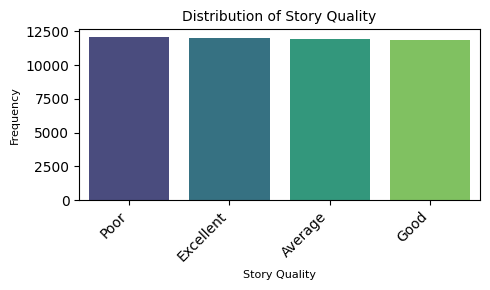

C:\Users\admin\AppData\Local\Temp\ipykernel_23640\2330942625.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="User Review Text", order=data["User Review Text"].value_counts().index, palette="viridis")
C:\Users\admin\AppData\Local\Temp\ipykernel_23640\2330942625.py:98: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


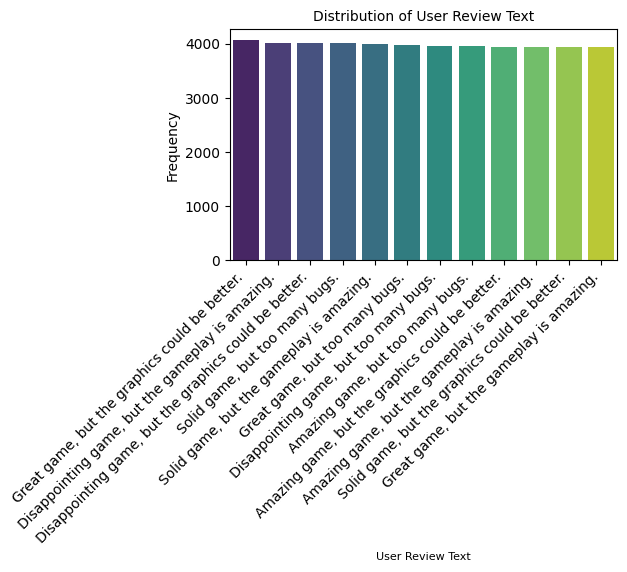

C:\Users\admin\AppData\Local\Temp\ipykernel_23640\2330942625.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Game Mode", order=data["Game Mode"].value_counts().index, palette="viridis")


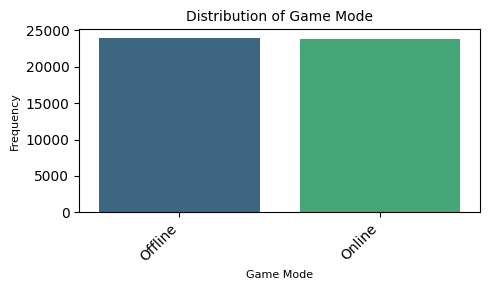

In [4]:
#Histogram
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x="Age Group Targeted", order=data["Age Group Targeted"].value_counts().index, palette="viridis")
plt.title("Distribution of Age Group Targeted", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Age Group Targeted", fontsize=8)
plt.ylabel("Frequency", fontsize=8)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(data=data, x="Platform", order=data["Platform"].value_counts().index, palette="viridis")
plt.title("Distribution of Platform", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Platform", fontsize=8)
plt.ylabel("Frequency", fontsize=8)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(data=data, x="Requires Special Device", order=data["Requires Special Device"].value_counts().index, palette="viridis")
plt.title("Distribution of Requires Special Device", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Requires Special Device", fontsize=8)
plt.ylabel("Frequency", fontsize=8)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(data=data, x="Developer", order=data["Developer"].value_counts().index, palette="viridis")
plt.title("Distribution of Developer", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Developer", fontsize=8)
plt.ylabel("Frequency", fontsize=8)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(data=data, x="Publisher", order=data["Publisher"].value_counts().index, palette="viridis")
plt.title("Distribution of Publisher", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Publisher", fontsize=8)
plt.ylabel("Frequency", fontsize=8)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(data=data, x="Genre", order=data["Genre"].value_counts().index, palette="viridis")
plt.title("Distribution of Genre", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genre", fontsize=8)
plt.ylabel("Frequency", fontsize=8)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(data=data, x="Multiplayer", order=data["Multiplayer"].value_counts().index, palette="viridis")
plt.title("Distribution of Multiplayer", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Multiplayer", fontsize=8)
plt.ylabel("Frequency", fontsize=8)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(data=data, x="Graphics Quality", order=data["Graphics Quality"].value_counts().index, palette="viridis")
plt.title("Distribution of Graphics Quality", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Graphics Quality", fontsize=8)
plt.ylabel("Frequency", fontsize=8)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(data=data, x="Soundtrack Quality", order=data["Soundtrack Quality"].value_counts().index, palette="viridis")
plt.title("Distribution of Soundtrack Quality", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Soundtrack Quality", fontsize=8)
plt.ylabel("Frequency", fontsize=8)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(data=data, x="Story Quality", order=data["Story Quality"].value_counts().index, palette="viridis")
plt.title("Distribution of Story Quality", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Story Quality", fontsize=8)
plt.ylabel("Frequency", fontsize=8)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(data=data, x="User Review Text", order=data["User Review Text"].value_counts().index, palette="viridis")
plt.title("Distribution of User Review Text", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlabel("User Review Text", fontsize=8)
plt.ylabel("Frequency", fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(data=data, x="Game Mode", order=data["Game Mode"].value_counts().index, palette="viridis")
plt.title("Distribution of Game Mode", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Game Mode", fontsize=8)
plt.ylabel("Frequency", fontsize=8)
plt.tight_layout()
plt.show()

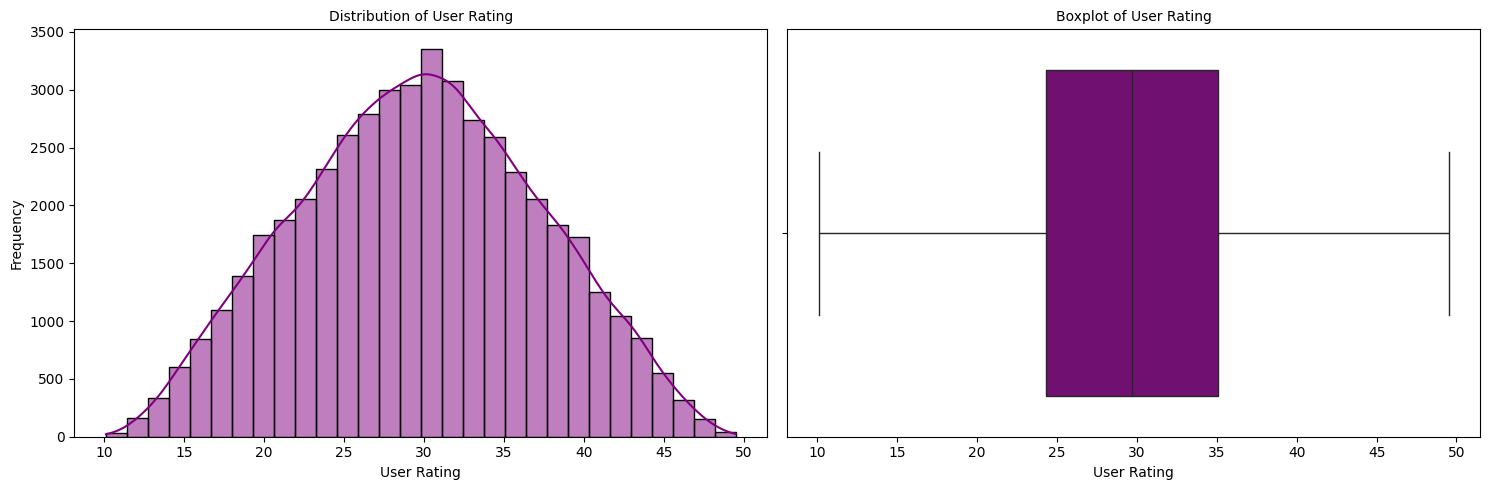

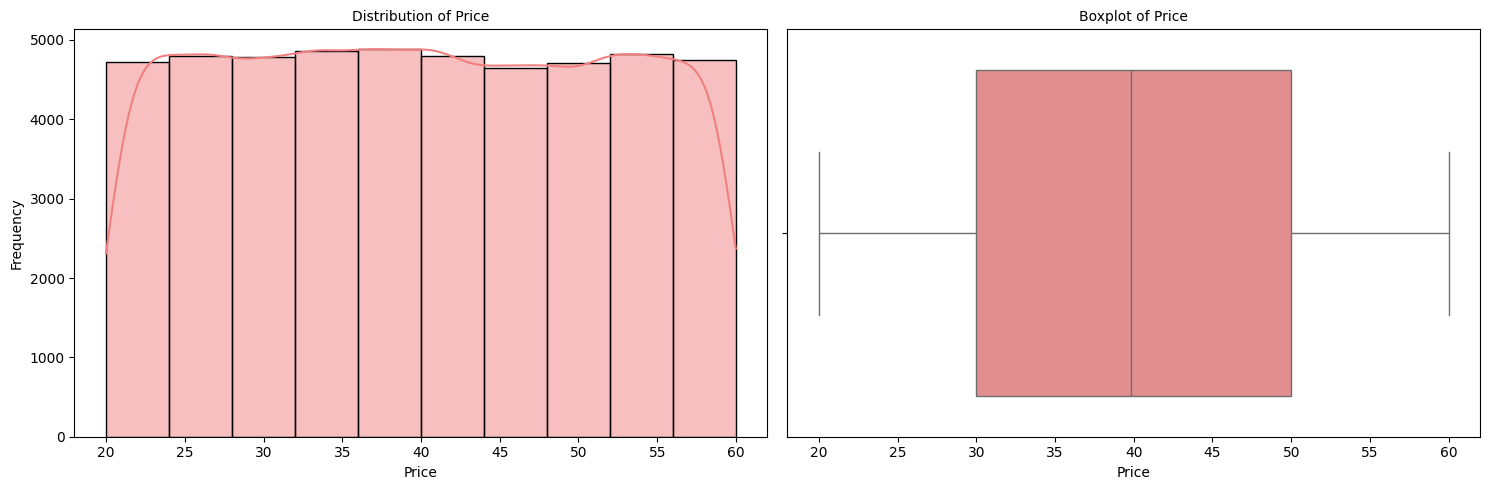

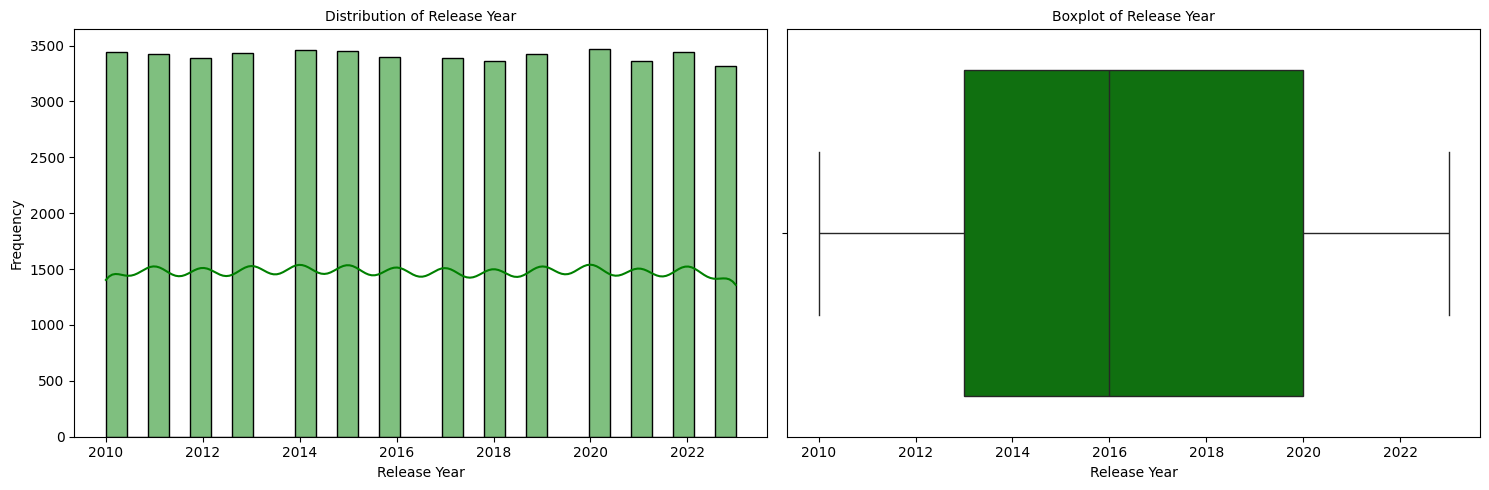

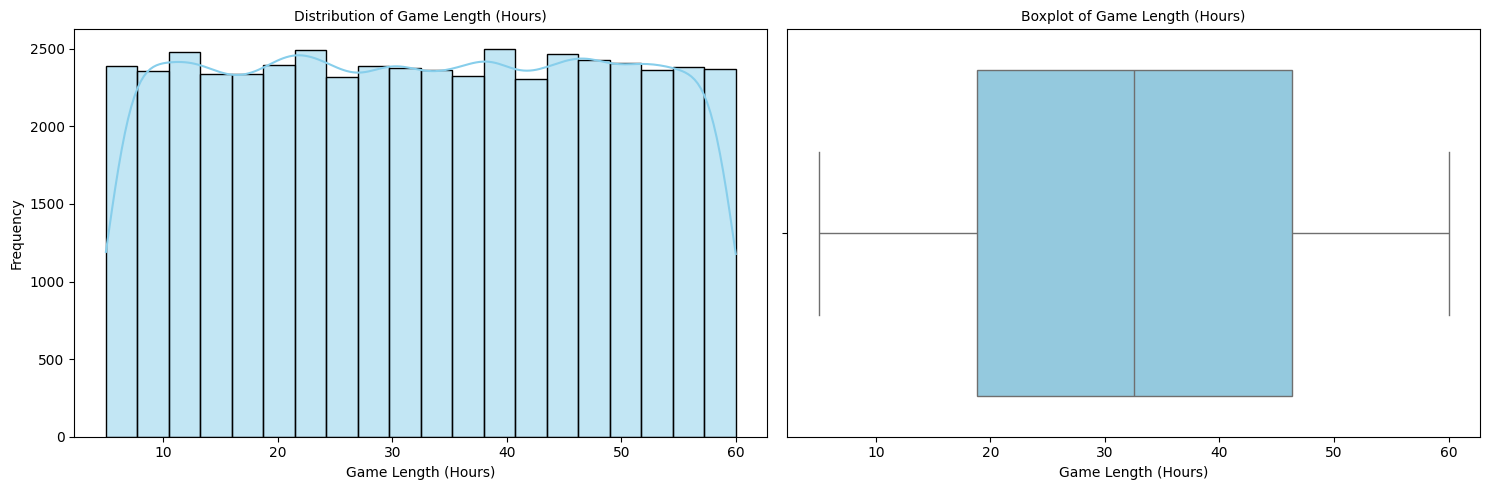

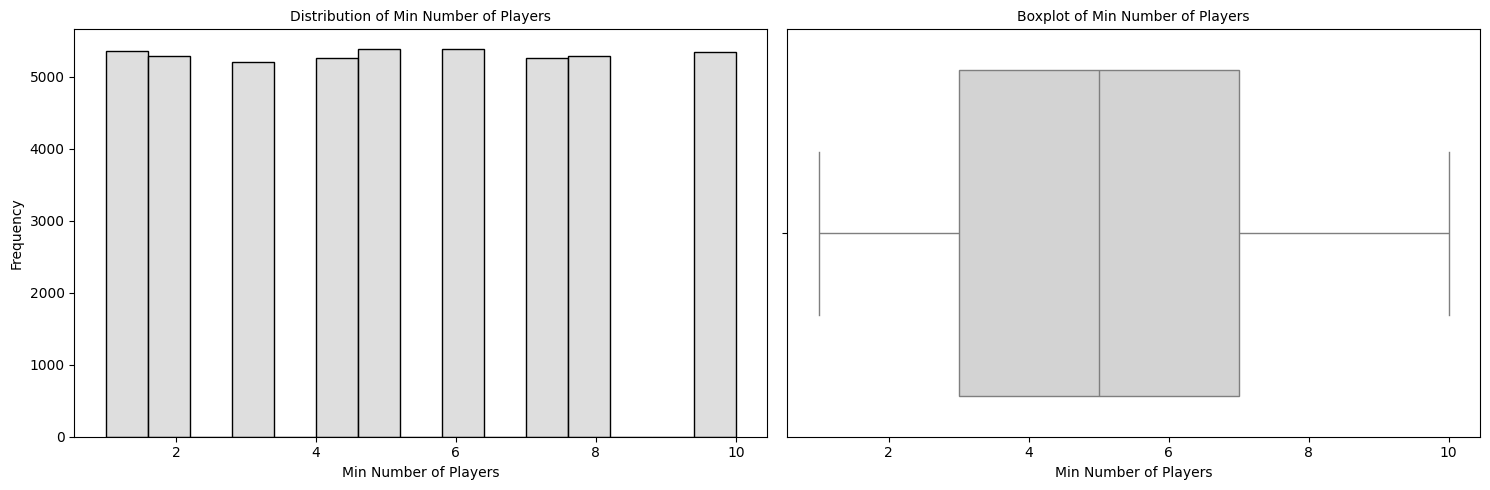

In [5]:
#Numerical
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# User Rating - Histogram
sns.histplot(data=data, x="User Rating", bins=30, kde=True, color="purple", ax=axes[0])
axes[0].set_title("Distribution of User Rating", fontsize=10)
axes[0].set_xlabel("User Rating", fontsize=10)
axes[0].set_ylabel("Frequency", fontsize=10)
# User Rating - Boxplot
sns.boxplot(data=data, x="User Rating", color="purple", ax=axes[1])
axes[1].set_title("Boxplot of User Rating", fontsize=10)
axes[1].set_xlabel("User Rating", fontsize=10)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# Price - Histogram
sns.histplot(data=data, x="Price", bins=10, kde=True, color="lightcoral", ax=axes[0])
axes[0].set_title("Distribution of Price", fontsize=10)
axes[0].set_xlabel("Price", fontsize=10)
axes[0].set_ylabel("Frequency", fontsize=10)
# Price - Boxplot
sns.boxplot(data=data, x="Price", color="lightcoral", ax=axes[1])
axes[1].set_title("Boxplot of Price", fontsize=10)
axes[1].set_xlabel("Price", fontsize=10)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# Release Year - Histogram
sns.histplot(data=data, x="Release Year", bins=30, kde=True, color="green", ax=axes[0])
axes[0].set_title("Distribution of Release Year", fontsize=10)
axes[0].set_xlabel("Release Year", fontsize=10)
axes[0].set_ylabel("Frequency", fontsize=10)
# Release Year - Boxplot
sns.boxplot(data=data, x="Release Year", color="green", ax=axes[1])
axes[1].set_title("Boxplot of Release Year", fontsize=10)
axes[1].set_xlabel("Release Year", fontsize=10)
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# Game Length (Hours) - Histogram
sns.histplot(data=data, x="Game Length (Hours)", bins=20, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Distribution of Game Length (Hours)", fontsize=10)
axes[0].set_xlabel("Game Length (Hours)", fontsize=10)
axes[0].set_ylabel("Frequency", fontsize=10)
# Game Length (Hours) - Boxplot
sns.boxplot(data=data, x="Game Length (Hours)", color="skyblue", ax=axes[1])
axes[1].set_title("Boxplot of Game Length (Hours)", fontsize=10)
axes[1].set_xlabel("Game Length (Hours)", fontsize=10)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# Min Number of Players - Histogram
sns.histplot(data=data, x="Min Number of Players", bins=15, kde=False, color="lightgrey", ax=axes[0])
axes[0].set_title("Distribution of Min Number of Players", fontsize=10)
axes[0].set_xlabel("Min Number of Players", fontsize=10)
axes[0].set_ylabel("Frequency", fontsize=10)
# Min Number of Players - Boxplot
sns.boxplot(data=data, x="Min Number of Players", color="lightgrey", ax=axes[1])
axes[1].set_title("Boxplot of Min Number of Players", fontsize=10)
axes[1].set_xlabel("Min Number of Players", fontsize=10)
plt.tight_layout()
plt.show()

In [9]:
categorical_columns = [
    "Platform",
    "Requires Special Device",
    "Age Group Targeted",
    "Genre",
    "Multiplayer",
    "Game Mode"
]
 
# Label Encoding to convert categorical columns to numeric values
label_encoders = {}  # To hold a LabelEncoder object per column
 
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])  #Convert column to numeric values
    label_encoders[column] = le  # Save Encoder
 
graphics_quality_map = {"Low": 0, "Medium": 1, "High": 2, "Ultra": 3}
soundtrack_quality_map = {"Poor": 0, "Average": 1, "Good": 2, "Excellent": 3}
story_quality_map = {"Poor": 0, "Average": 1, "Good": 2, "Excellent": 3}
 
data['Graphics Quality'] = data['Graphics Quality'].map(graphics_quality_map)
data['Soundtrack Quality'] = data['Soundtrack Quality'].map(soundtrack_quality_map)
data['Story Quality'] = data['Story Quality'].map(story_quality_map)
 
data.to_csv("video_game_reviews_encoded.csv", index=False)
 
print(data.head())
 
# Display labels of categorical columns
for column, le in label_encoders.items():
    print(f"{column}: {list(le.classes_)}")

           Game Title  User Rating  Age Group Targeted  Price  Platform  \
0  Grand Theft Auto V         36.4                   1  41.41         2   
1          The Sims 4         38.3                   0  57.56         2   
2           Minecraft         26.8                   3  44.93         2   
3   Bioshock Infinite         38.4                   1  48.29         0   
4     Half-Life: Alyx         30.1                   0  55.49         3   

   Requires Special Device   Developer        Publisher  Release Year  Genre  \
0                        0  Game Freak       Innersloth          2015      1   
1                        0    Nintendo  Electronic Arts          2015      6   
2                        1      Bungie           Capcom          2012      1   
3                        1  Game Freak         Nintendo          2015      8   
4                        1  Game Freak       Epic Games          2022      5   

   Multiplayer  Game Length (Hours)  Graphics Quality  Soundtrack Qu

In [10]:
print("LabelEncoder coded columns:")
for column, le in label_encoders.items():
    print(f"Column: {column}")
    print("Label -> Category")
    for category, label in enumerate(le.classes_): 
        print(f"{category} -> {label}")
    print("-" * 30)
 
print("Manuel coded columns:")
manual_mappings = {
    "Graphics Quality": {"Low": 0, "Medium": 1, "High": 2, "Ultra": 3},
    "Soundtrack Quality": {"Poor": 0, "Average": 1, "Good": 2, "Excellent": 3},
    "Story Quality": {"Poor": 0, "Average": 1, "Good": 2, "Excellent": 3}
}
 
for column, mapping in manual_mappings.items():
    print(f"Column: {column}")
    print("Label -> Category")
    for category, label in mapping.items():
        print(f"{label} -> {category}")
    print("-" * 30)

LabelEncoder coded columns:
Column: Platform
Label -> Category
0 -> Mobile
1 -> Nintendo Switch
2 -> PC
3 -> PlayStation
4 -> Xbox
------------------------------
Column: Requires Special Device
Label -> Category
0 -> No
1 -> Yes
------------------------------
Column: Age Group Targeted
Label -> Category
0 -> Adults
1 -> All Ages
2 -> Kids
3 -> Teens
------------------------------
Column: Genre
Label -> Category
0 -> Action
1 -> Adventure
2 -> Fighting
3 -> Party
4 -> Puzzle
5 -> RPG
6 -> Shooter
7 -> Simulation
8 -> Sports
9 -> Strategy
------------------------------
Column: Multiplayer
Label -> Category
0 -> No
1 -> Yes
------------------------------
Column: Game Mode
Label -> Category
0 -> Offline
1 -> Online
------------------------------
Manuel coded columns:
Column: Graphics Quality
Label -> Category
0 -> Low
1 -> Medium
2 -> High
3 -> Ultra
------------------------------
Column: Soundtrack Quality
Label -> Category
0 -> Poor
1 -> Average
2 -> Good
3 -> Excellent
-----------------

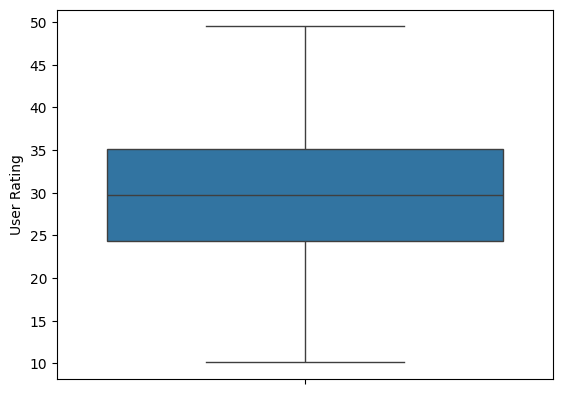

In [11]:
sns.boxplot(data['User Rating'])
 
# Z-score
z_scores = (data['User Rating'] - data['User Rating'].mean()) / data['User Rating'].std()
data_cleaned = data[z_scores.abs() < 3]  #Keep Z-score less than 3

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
 
# MinMaxScaler or StandardScaler selection
scaler = MinMaxScaler()  # or scaler = StandardScaler()
 
# Scaling the specified columns
scaled_features = scaler.fit_transform(data[['User Rating', 'Price', 'Game Length (Hours)']])
 
# Write the scaled data back to the original DataFrame
data[['User Rating', 'Price', 'Game Length (Hours)']] = scaled_features
 
# Checking scaled data after processing
print("Scaled data:")
print(data[['User Rating', 'Price', 'Game Length (Hours)']].head())
 
# Checking statistics of features (for MinMaxScaler)
print("\nMin and max values of features(MinMaxScaler):")
print(data[['User Rating', 'Price', 'Game Length (Hours)']].describe())

Scaled data:
   User Rating    Price  Game Length (Hours)
0     0.667513  0.53550             0.914545
1     0.715736  0.93925             0.538182
2     0.423858  0.62350             0.161818
3     0.718274  0.70750             0.670909
4     0.507614  0.88750             0.149091

Min and max values of features(MinMaxScaler):
        User Rating         Price  Game Length (Hours)
count  47774.000000  47774.000000         47774.000000
mean       0.497953      0.499034             0.499667
std        0.191628      0.288009             0.288591
min        0.000000      0.000000             0.000000
25%        0.360406      0.250000             0.250909
50%        0.497462      0.496375             0.500000
75%        0.634518      0.749188             0.750909
max        1.000000      1.000000             1.000000


In [13]:
data

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,0.667513,1,0.53550,2,0,Game Freak,Innersloth,2015,1,0,0.914545,1,1,0,"Solid game, but too many bugs.",0,1
1,The Sims 4,0.715736,0,0.93925,2,0,Nintendo,Electronic Arts,2015,6,1,0.538182,0,0,0,"Solid game, but too many bugs.",0,3
2,Minecraft,0.423858,3,0.62350,2,1,Bungie,Capcom,2012,1,1,0.161818,0,2,1,"Great game, but the graphics could be better.",0,5
3,Bioshock Infinite,0.718274,1,0.70750,0,1,Game Freak,Nintendo,2015,8,0,0.670909,1,2,3,"Solid game, but the graphics could be better.",1,4
4,Half-Life: Alyx,0.507614,0,0.88750,3,1,Game Freak,Epic Games,2022,5,1,0.149091,2,0,2,"Great game, but too many bugs.",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47769,Minecraft,0.799492,1,0.72800,3,1,Valve,Innersloth,2016,3,0,0.940000,0,3,1,"Amazing game, but the graphics could be better.",1,4
47770,The Legend of Zelda: Breath of the Wild,0.357868,2,0.29250,4,1,Valve,Electronic Arts,2023,9,0,0.449091,2,2,3,"Solid game, but the graphics could be better.",0,1
47771,Animal Crossing: New Horizons,0.421320,1,0.62275,3,1,Game Freak,Square Enix,2018,8,0,0.058182,0,0,2,"Great game, but the gameplay is amazing.",0,5
47772,The Legend of Zelda: Breath of the Wild,0.314721,2,0.25000,4,1,Epic Games,Epic Games,2018,7,1,0.449091,2,0,3,"Disappointing game, but the graphics could be ...",0,1


In [14]:
data_ML_game = data[['Platform','Requires Special Device', 'Genre', 'Multiplayer', 'Graphics Quality', 'Soundtrack Quality','Story Quality', 'Game Mode', 'Min Number of Players']]
data_ML_game

,Platform,Requires Special Device,Genre,Multiplayer,Graphics Quality,Soundtrack Quality,Story Quality,Game Mode,Min Number of Players
0,2,0,1,0,1,1,0,0,1
1,2,0,6,1,0,0,0,0,3
2,2,1,1,1,0,2,1,0,5
3,0,1,8,0,1,2,3,1,4
4,3,1,5,1,2,0,2,0,1
...,...,...,...,...,...,...,...,...,...
47769,3,1,3,0,0,3,1,1,4
47770,4,1,9,0,2,2,3,0,1
47771,3,1,8,0,0,0,2,0,5
47772,4,1,7,1,2,0,3,0,1


In [15]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_ML_game[['Requires Special Device', 'Genre', 'Multiplayer', 'Graphics Quality', 'Soundtrack Quality','Story Quality', 'Game Mode', 'Min Number of Players']],
    data_ML_game['Platform'], 
    test_size=0.2, 
    random_state=0
)

In [ ]:
X_train.shape


In [ ]:
from sklearn import svm

from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1, probability=True).fit(X_train, y_train)


In [59]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [61]:
y_pred = clf.predict(X_test)

In [63]:
y_pred

array([0, 0, 1, ..., 3, 1, 2], dtype=int64)

In [65]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('\nTrue Positives (TP) =', cm[0, 0])
print('True Negatives (TN) =', cm[1, 1])
print('False Positives (FP) =', cm[0, 1])
print('False Negatives (FN) =', cm[1, 0])


True Positives (TP) = 4768
True Negatives (TN) = 4723
False Positives (FP) = 0
False Negatives (FN) = 0


In [67]:
# importing Libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc,roc_auc_score

In [69]:
print("Formato de X_test:", X_test.shape)
print("Número de características esperadas pelo modelo:", clf.n_features_in_)


Formato de X_test: (19110, 2)
Número de características esperadas pelo modelo: 2


In [71]:
X_train, X_test = X_train.align(X_test, axis=1, join='inner')  # Alinha colunas


In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Durante o treinamento
X_test_scaled = scaler.transform(X_test)        # Durante o teste


In [75]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Métricas básicas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

# ROC AUC para problemas multiclasses
if hasattr(clf, "predict_proba"):
    y_prob = clf.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')  # 'ovo' também é uma opção
elif hasattr(clf, "decision_function"):
    y_score = clf.decision_function(X_test)
    roc_auc = roc_auc_score(y_test, y_score, multi_class='ovr')
else:
    roc_auc = "Modelo não suporta predict_proba nem decision_function"

# Imprimir as métricas
print("\nMetrics:")
print("Accuracy:", accuracy)
print("Precision (macro):", precision)
print("Recall (macro):", recall)
print("F1-Score (macro):", f1)
print("ROC AUC (One-vs-Rest):", roc_auc)




Confusion Matrix:
 [[4768    0    0    0]
 [   0 4723    0    0]
 [   0    0 4814    0]
 [   0    0    0 4805]]


ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

In [77]:
if hasattr(clf, "predict_proba"):
    y_prob = clf.predict_proba(X_test)
elif hasattr(clf, "decision_function"):
    y_score = clf.decision_function(X_test)
    y_prob = None
else:
    print("O classificador não suporta predict_proba nem decision_function. Ajuste necessário.")

# Classes válidas
valid_classes = clf.classes_
mask = np.isin(y_test, valid_classes)

# Filtrar os dados
y_test_filtered = y_test[mask]
if y_prob is not None:
    y_prob_filtered = y_prob[mask]
    if y_prob_filtered.ndim == 2:
        y_prob_filtered = y_prob_filtered[:, 1]  # Apenas a coluna da classe positiva

# Previsão de classes
y_pred = clf.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

# Calcular ROC AUC apenas se y_prob_filtered for válido
if y_prob is not None and y_prob_filtered.ndim == 1:
    roc_auc = roc_auc_score(y_test_filtered, y_prob_filtered)
    print("ROC AUC:", roc_auc)
else:
    print("ROC AUC não calculado devido a limitações do classificador.")

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


ROC AUC não calculado devido a limitações do classificador.
Confusion Matrix:
[[4768    0    0    0]
 [   0 4723    0    0]
 [   0    0 4814    0]
 [   0    0    0 4805]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Configurar o estilo do Seaborn
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_test_filtered, y_prob_filtered)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(10, 6))
sns.lineplot(x=fpr, y=tpr, label=f"Curva ROC (AUC = {roc_auc:.2f})", lw=2, color="b")
sns.lineplot(x=[0, 1], y=[0, 1], label="Linha de referência (AUC = 0.5)", lw=2, linestyle="--", color="r")

# Configurações adicionais do gráfico
plt.title("Curva ROC", fontsize=16)
plt.xlabel("Taxa de Falsos Positivos (FPR)", fontsize=14)
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.tight_layout()

# Exibir o gráfico
plt.show()




NameError: name 'y_prob_filtered' is not defined

In [81]:


# Definir colunas e índices com base no tamanho da matriz de confusão
cm_matrix = pd.DataFrame(
    data=cm, 
    columns=['Actual Positive:1', 'Actual Negative:0'],  # Ajuste aqui conforme o tamanho de `cm`
    index=['Predict Positive:1', 'Predict Negative:0']   # Ajuste aqui conforme o tamanho de `cm`
)

# Plotar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Matriz de Confusão")
plt.xlabel("Classe Real")
plt.ylabel("Classe Prevista")
plt.show()


ValueError: Shape of passed values is (4, 4), indices imply (2, 2)

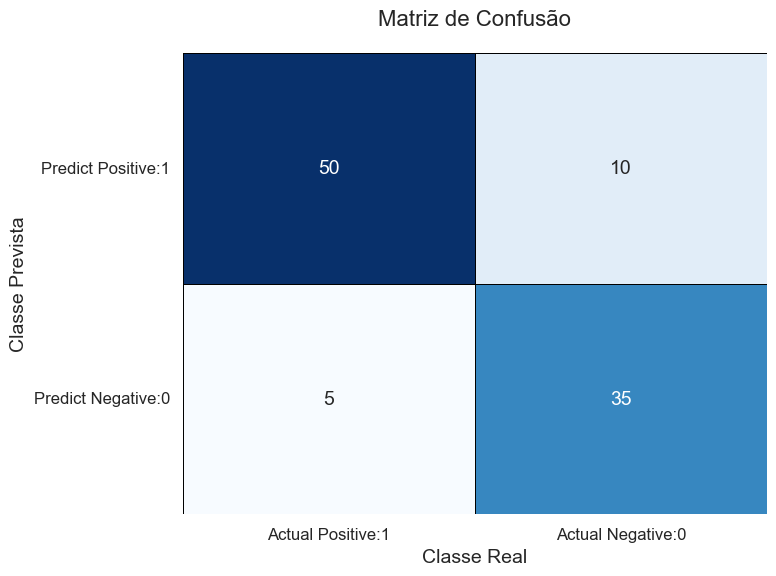

In [83]:
 #Matriz de Confusão (exemplo, ajuste conforme seus dados)
cm = [[50, 10], [5, 35]]  # Substitua pela sua matriz de confusão real

# Criar DataFrame com os rótulos apropriados
cm_matrix = pd.DataFrame(
    data=cm,
    columns=['Actual Positive:1', 'Actual Negative:0'],  # Ajuste conforme necessário
    index=['Predict Positive:1', 'Predict Negative:0']   # Ajuste conforme necessário
)

# Plotar o heatmap com estilo personalizado
plt.figure(figsize=(8, 6))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 14})

# Personalizar títulos e rótulos
plt.title("Matriz de Confusão", fontsize=16, pad=20)
plt.xlabel("Classe Real", fontsize=14)
plt.ylabel("Classe Prevista", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


In [85]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
probas = clf.predict_proba(X_test[:1])
predictions = clf.predict(X_test[:5, :])
score = clf.score(X_test, y_test)


# Print results
print("Probabilities for first test sample:", probas)
print("Predictions for first 5 test samples:", predictions)
print("Score on test set:", score)

Probabilities for first test sample: [[0.03838405 0.96161595]]
Predictions for first 5 test samples: [1 0 1 0 1]
Score on test set: 0.88


In [87]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [89]:
clf.predict(X_test)

array([1])

array([[0., 1.]])

[Text(0.5, 0.75, 'x[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

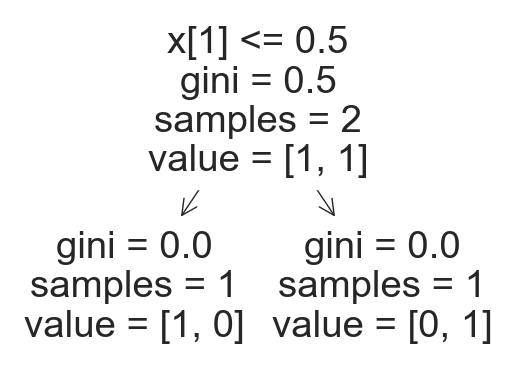

In [93]:
tree.plot_tree(clf)

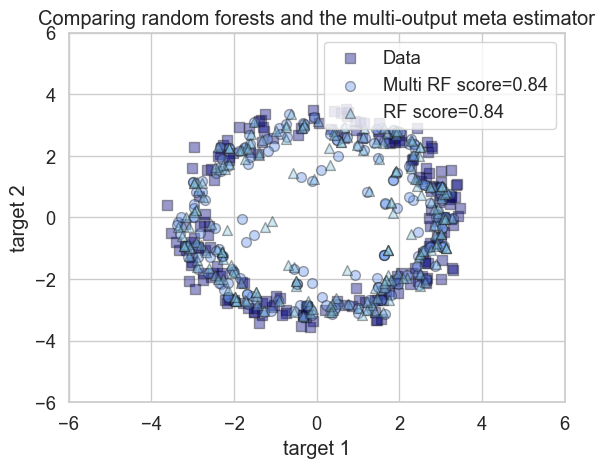

In [95]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestclassifier
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(600, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y += 0.5 - rng.rand(*y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=400, test_size=200, random_state=4
)

max_depth = 30
regr_multirf = MultiOutputRegressor(
    RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=0)
)
regr_multirf.fit(X_train, y_train)

regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rf = regr_rf.predict(X_test)

# Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(
    y_test[:, 0],
    y_test[:, 1],
    edgecolor="k",
    c="navy",
    s=s,
    marker="s",
    alpha=a,
    label="Data",
)
plt.scatter(
    y_multirf[:, 0],
    y_multirf[:, 1],
    edgecolor="k",
    c="cornflowerblue",
    s=s,
    alpha=a,
    label="Multi RF score=%.2f" % regr_multirf.score(X_test, y_test),
)
plt.scatter(
    y_rf[:, 0],
    y_rf[:, 1],
    edgecolor="k",
    c="c",
    s=s,
    marker="^",
    alpha=a,
    label="RF score=%.2f" % regr_rf.score(X_test, y_test),
)
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Comparing random forests and the multi-output meta estimator")
plt.legend()
plt.show()

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [99]:
print(y_train.shape)


(480, 2)


In [101]:
y_train = y_train.ravel()


In [103]:
print("Shape de X_train:", X_train.shape)
print("Shape de y_train:", y_train.shape)



Shape de X_train: (480, 1)
Shape de y_train: (960,)


In [105]:
y_train = y_train.iloc[:, 0]  # Use a primeira coluna de rótulos


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
from sklearn.linear_model import LogisticRegression
model_baseline = LogisticRegression()
model_baseline.fit(X_train, y_train)
